In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Name of the CSV file
file = '../Resources/US_Accidents_May19.csv'
df = pd.read_csv(file)

In [10]:
df["Street"]

0                             I-70 E
1                           Brice Rd
2                     State Route 32
3                             I-75 S
4          Miamisburg Centerville Rd
                     ...            
2243934         San Bernardino Fwy E
2243935                        I-5 N
2243936                       I-10 E
2243937          Ronald Reagan Fwy W
2243938           Golden State Fwy S
Name: Street, Length: 2243939, dtype: object

In [61]:
# Add a column to sort by year
df["Start_Year"] = df["Start_Time"].agg(lambda x: x.split("-")[0])

In [63]:
infrastructure_list = ["Bump","Crossing","Give_Way","Junction","No_Exit","Railway","Roundabout","Station","Stop","Traffic_Calming","Traffic_Signal","Turning_Loop"]
accident_data_2016 = []
accident_data_2017 = []
accident_data_2018 = []
years = ["2016","2017","2018"]
i = 0
for year in years:
    for traffic_type in infrastructure_list:
        if year == "2016":
            accident_data_2016.append(df[traffic_type].loc[(df[traffic_type] == True) & (df["Start_Year"] == year)].count())
        elif year == "2017":
            accident_data_2017.append(df[traffic_type].loc[(df[traffic_type] == True) & (df["Start_Year"] == year)].count())
        elif year == "2018":
            accident_data_2018.append(df[traffic_type].loc[(df[traffic_type] == True) & (df["Start_Year"] == year)].count())

print(accident_data_2016)
print(accident_data_2017)
print(accident_data_2018)



[26, 20180, 811, 42276, 293, 3269, 19, 8123, 3611, 116, 63673, 0]
[77, 39327, 1567, 62762, 743, 5839, 37, 11858, 6682, 188, 119091, 0]
[109, 50531, 1893, 66840, 918, 7373, 53, 13212, 9189, 251, 144430, 0]


In [65]:
sum_data = []
i = 0
for i in range(0,len(accident_data_2016)):
    sum_data.append(accident_data_2016[i]+accident_data_2017[i]+accident_data_2018[i])
print(sum_data)

[212, 110038, 4271, 171878, 1954, 16481, 109, 33193, 19482, 555, 327194, 0]


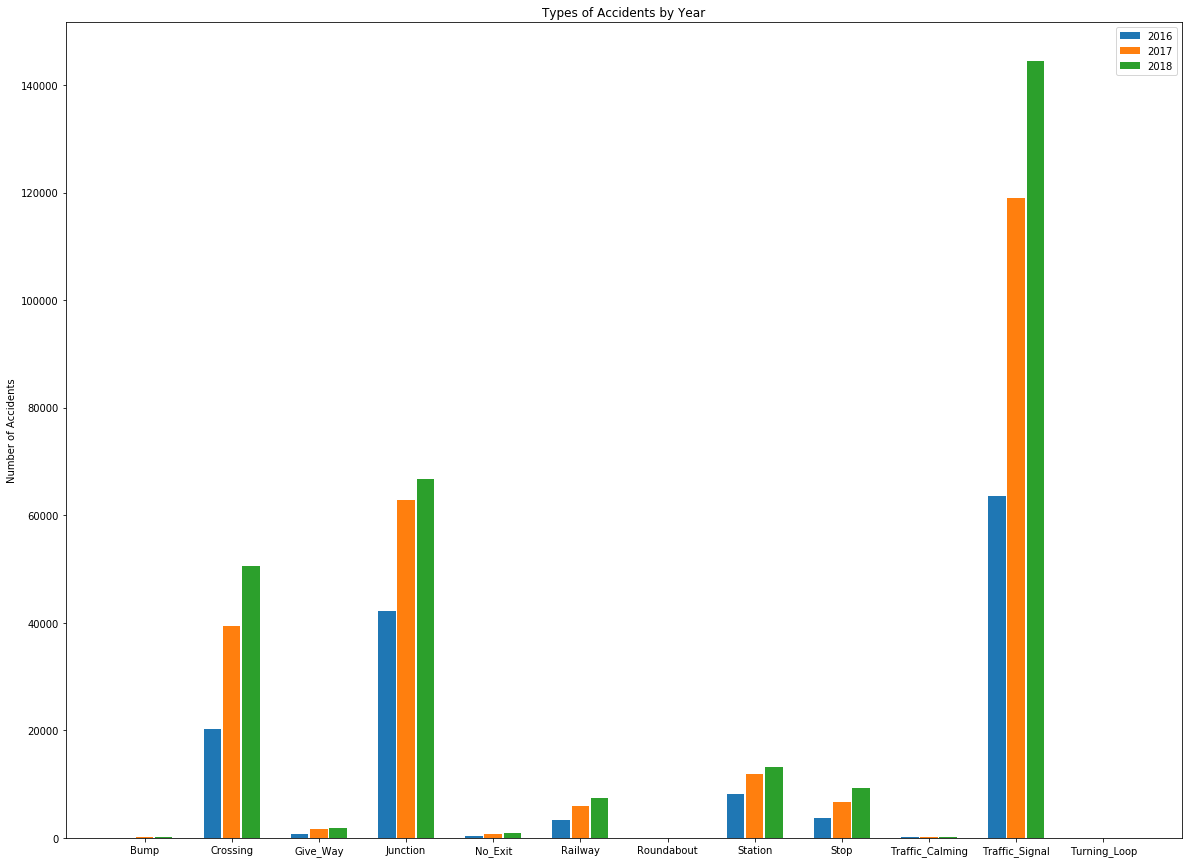

In [83]:
x = np.arange(len(infrastructure_list))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize = (20,15))
rects1 = ax.bar(x - width*1.1, accident_data_2016, width, label='2016')
rects2 = ax.bar(x, accident_data_2017, width, label='2017')
rects3 = ax.bar(x + width*1.1, accident_data_2018, width, label='2018')

ax.set_ylabel('Number of Accidents')
ax.set_title('Accidents Near Traffic Infrastructure')
ax.set_xticks(x)
ax.set_xticklabels(infrastructure_list)
ax.legend()
#plt.show()
#plt.pie(heights,labels=x_names,labeldistance=1.15,autopct='%1.1f%%',pctdistance=.9,rotatelabels=False)
#plt.show()
